# Statistical Distribution

A statistical distribution is a representation of the frequencies of potential events or the percentage of time each event occurs.

## Discrete Distributions

Definition:

    A discrete distribution describes random variables that can take on a countable number of distinct values.

Examples:

    Rolling a die (possible outcomes: 1, 2, 3, 4, 5, 6)
    Number of defective items in a batch
    Count of customers arriving at a store in an hour

## Continuous Distributions

Definition:

    A continuous distribution describes random variables that can take on an infinite number of values within a given range.

Examples:

    Heights of individuals
    Time taken to complete a task
    Temperature measurements

## Common Types of Distributions

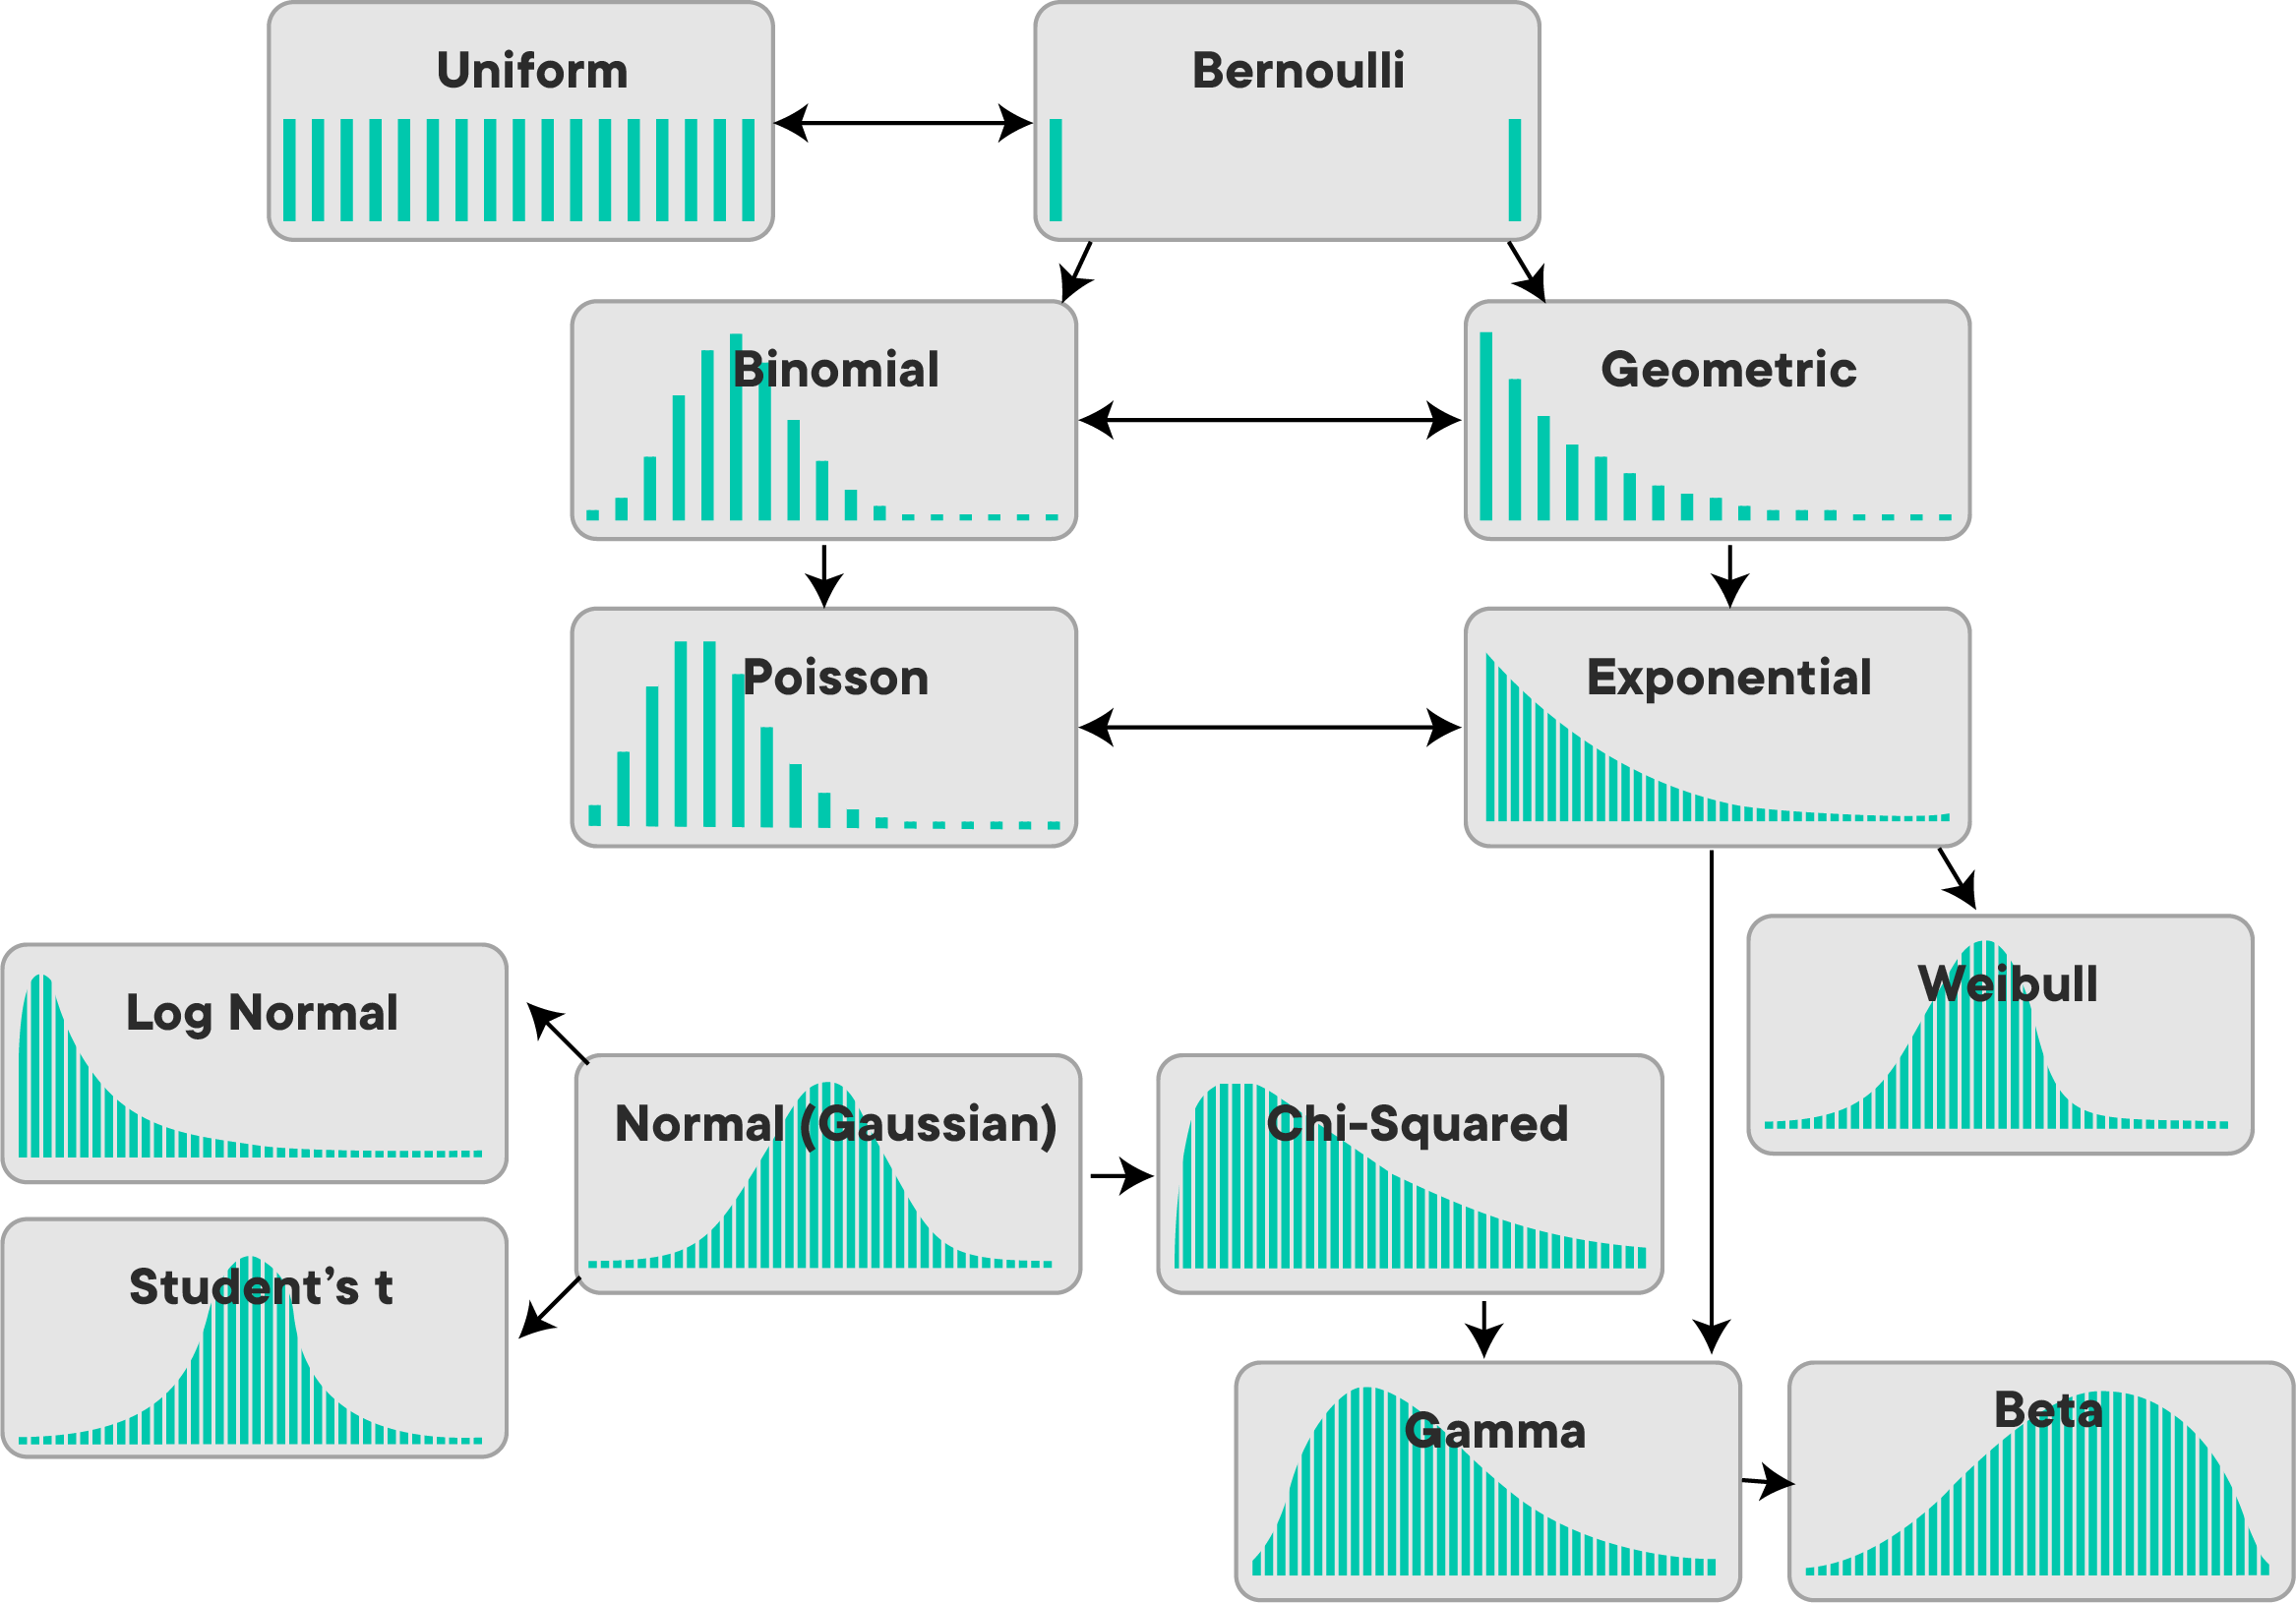

# Introduction to Sampling 


The **population** is equivalent to the universal set. Just like a universal set, a population is not necessarily all possible things that have ever existed, it just means all possible things within some defined specification.

The **sample** is a subset of this population. Every element in the sample is part of the population. In theory we could have a sample that includes every member of the population, but typically when we call something a "sample" we mean that it is a proper subset of the population (that the population contains additional members that are not part of the sample).


In [1]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# read the data
df  = pd.read_csv("./data/titanic.csv")
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 13)

## Sampling Example using The Titanic Dataset 

In [4]:
# select column to sample  
# check shape
age = df["Age"].dropna()

## Population Mean
denoted as μ, is a measure of central tendency that represents the average of a set of values in an entire population

In [50]:
# caculate the population mean 
age.mean()

np.float64(29.69911764705882)

## Sample Mean 

denoted as xˉ, is a measure of central tendency that represents the average of a subset (sample) of data taken from a larger population. It is used to estimate the population mean when it is impractical to collect data from the entire population.

In [82]:
# A large enough Sample has a mean close to the population mean(try 400,500,600) 
# small samles can bea misleading 
# caculate sample mean
age.sample(600).mean()


np.float64(29.36596666666667)

## With Multiple Samples 

In [97]:
# sample mean with multiple samples
sample_means = []
for i in range(500):
    sample_mean = age.sample(10).mean()
    sample_means.append(sample_mean)

In [98]:
sample_means

[np.float64(34.9),
 np.float64(30.45),
 np.float64(29.1),
 np.float64(33.05),
 np.float64(25.15),
 np.float64(31.0),
 np.float64(36.9),
 np.float64(36.6),
 np.float64(25.7),
 np.float64(32.4),
 np.float64(34.6),
 np.float64(35.9),
 np.float64(29.65),
 np.float64(34.882999999999996),
 np.float64(25.567),
 np.float64(33.2),
 np.float64(26.25),
 np.float64(29.2),
 np.float64(24.7),
 np.float64(27.2),
 np.float64(37.8),
 np.float64(23.567),
 np.float64(26.3),
 np.float64(21.2),
 np.float64(28.95),
 np.float64(30.0),
 np.float64(38.5),
 np.float64(35.35),
 np.float64(33.45),
 np.float64(38.4),
 np.float64(24.7),
 np.float64(32.1),
 np.float64(30.9),
 np.float64(28.375),
 np.float64(33.3),
 np.float64(30.0),
 np.float64(27.792),
 np.float64(27.1),
 np.float64(29.4),
 np.float64(26.442),
 np.float64(26.4),
 np.float64(26.9),
 np.float64(29.65),
 np.float64(27.15),
 np.float64(29.5),
 np.float64(36.7),
 np.float64(33.9),
 np.float64(30.5),
 np.float64(26.95),
 np.float64(18.342000000000002),
 

In [99]:
# caculate the mean of the sample mean
np.mean(sample_means)

np.float64(29.623492)

# PMF (Probability Mass Function)

PMF (Probability Mass Function)

Definition: Used for discrete random variables. It gives the probability that a discrete random variable is exactly equal to a specific value.

Notation: For a discrete random variable X, the PMF is denoted as P(X=x)
Properties:

    P(X=x)≥0 for all x.

    ∑P(X=x)=1 over all possible values of xx.

## PMF Intuition 

A probability is a number in the range [0,1] that is calculated as the frequency expressed as a fraction of the sample size.

This means that, in order to convert any random variable's frequency into a probability, we need to perform the following steps:

    - Get the frequency of every possible value in the dataset

    - Divide the frequency of each value by the total number of values (length of dataset)

    - Get the probability for each value


## When to Use PMF

Discrete Random Variables: Use the PMF when dealing with discrete random variables, which take on specific, countable values (e.g., number of successes in a series of trials, counts of occurrences).

Calculating Probabilities of Specific Outcomes: PMF is used to find the probability of a specific outcome. For example, if you want the probability of rolling a 3 on a six-sided die, you would use the PMF.

In [103]:
# Toy example
# with collections
import collections

x = [1,1,2,1,3,3,2,4,4,5,5,4]
counter = collections.Counter(x)
counter



Counter({1: 3, 4: 3, 2: 2, 3: 2, 5: 2})

In [105]:
# calculating  pmf values 
pmf_list = []
for key,val in counter.items():
    pmf = val / len(x)
    pmf_list.append(pmf)

In [106]:
pmf_list

[0.25, 0.16666666666666666, 0.16666666666666666, 0.25, 0.16666666666666666]

In [107]:
np.sum(pmf_list)

np.float64(0.9999999999999999)

## Titanic Example

Using the titanic dataset to caculate the probabilty that a passager was male or female 

In [108]:
# choose column
df_gender = df["Sex"].dropna()
df_gender.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [109]:
# Calculate counts for each category in the column column
gender_counts = df_gender.value_counts()
gender_counts

Sex
male      577
female    314
Name: count, dtype: int64

In [110]:
pmf = gender_counts/df_gender.shape[0]
pmf


Sex
male      0.647587
female    0.352413
Name: count, dtype: float64

<Axes: xlabel='Sex'>

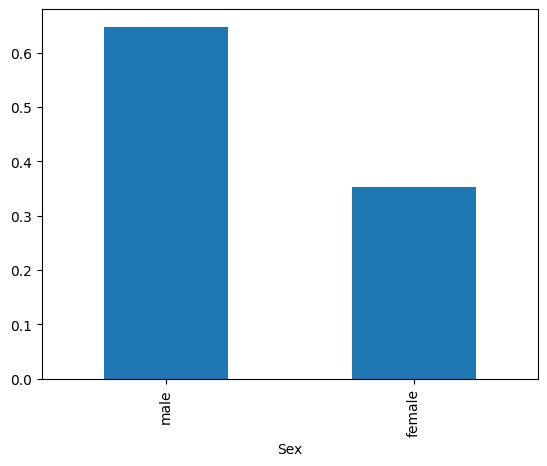

In [111]:

# Plotting the PMF with a bar graph
pmf.plot(kind="bar")


# PDF (Probability Density Function)


PDF (Probability Density Function)

**Definition**: Used for continuous random variables. 
It describes the likelihood of the variable falling within a particular range of values, rather than taking on a specific value.

**Notation**: For a continuous random variable X, the PDF is denoted as f(x).

Properties:

f(x)≥0 for all x.

The area under the curve of the PDF over the entire range is equal to 1: ∫−∞∞​f(x)dx=1.

The probability of X falling within a range [a,b] is given by ∫ab​f(x)dx.

## PDF intuition

1. Concept of Density

   **Continuous Variables**: Unlike discrete variables, continuous variables can take on an infinite number of values within a given range (e.g., heights, weights). Therefore, we can't assign a probability to a specific value (e.g., the probability of someone being exactly 170 cm tall is zero).
    
    Density: Instead, the PDF represents the density of probabilities. Higher values of the PDF at a point indicate a higher likelihood of the random variable being near that value.

2. Area Under the Curve

    **Probability as Area:** The PDF itself does not give probabilities directly; instead, probabilities are found by calculating the area under the curve of the PDF over a specific interval. For instance, the probability that a random variable X falls between a and b is given by:

    P(a<X<b)=∫ab​f(x)dx

3. Total Area Equals One

   **Normalization**: The total area under the PDF curve is always equal to 1. This reflects the fact that the random variable must take on some value within the range of possible values.

## When to use PDF

When dealing with continuous data: Use a PDF when the variable can take any value within a range. Examples include measurements like height, weight, temperature, or time.


To find the probability that a continuous variable falls within a specific range: Since the probability of a continuous variable taking on an exact value is zero, the PDF is used to calculate the probability of it falling within an interval by integrating the PDF over that interval.

## Example Using the titanic dataset (with librares)

In [113]:

# imports 
from scipy.stats import gaussian_kde
from scipy.integrate import trapezoid

In [114]:
# choose a column from the dataset 
df_age = df["Age"].dropna()
df_age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [115]:
# generate the estimator
kde = gaussian_kde(df_age)


In [122]:
# Create a range of ages for the PDF
age_range = np.linspace(df_age.min(),df_age.max(),1000)
# generate the pdf values ()
pdf = kde(age_range)
pdf


array([0.00570943, 0.00577645, 0.0058425 , 0.00590751, 0.00597147,
       0.00603432, 0.00609604, 0.00615658, 0.00621591, 0.006274  ,
       0.00633081, 0.00638631, 0.00644048, 0.00649329, 0.00654471,
       0.00659472, 0.0066433 , 0.00669042, 0.00673606, 0.00678021,
       0.00682286, 0.00686398, 0.00690357, 0.00694162, 0.00697812,
       0.00701306, 0.00704643, 0.00707825, 0.00710849, 0.00713717,
       0.0071643 , 0.00718986, 0.00721388, 0.00723636, 0.0072573 ,
       0.00727673, 0.00729466, 0.00731109, 0.00732606, 0.00733958,
       0.00735167, 0.00736235, 0.00737165, 0.00737959, 0.0073862 ,
       0.00739151, 0.00739556, 0.00739836, 0.00739996, 0.00740039,
       0.00739969, 0.00739789, 0.00739503, 0.00739115, 0.0073863 ,
       0.00738051, 0.00737383, 0.00736629, 0.00735796, 0.00734886,
       0.00733905, 0.00732858, 0.00731749, 0.00730584, 0.00729367,
       0.00728103, 0.00726797, 0.00725455, 0.00724081, 0.00722681,
       0.00721261, 0.00719825, 0.00718379, 0.00716929, 0.00715

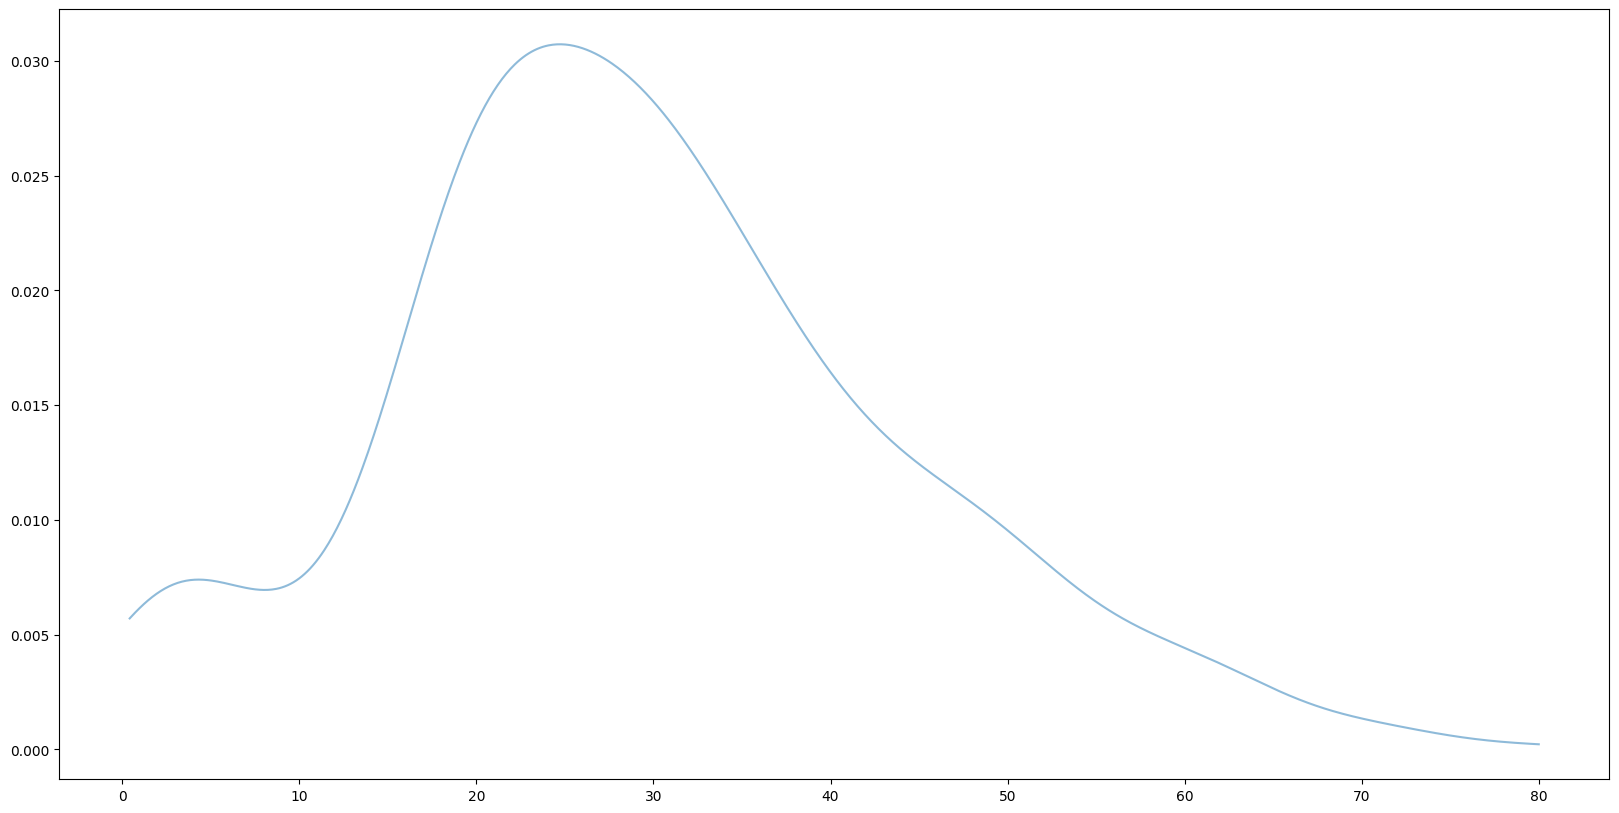

In [123]:
plt.figure(figsize=(20,10))
plt.plot(age_range,pdf,alpha=0.5)
plt.show()

In [47]:
# Plot the PDF


In [48]:
# Define the range for probability calculation
# Extra getting the probabilities 